In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "GOH"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GOH/baseline

Average verified rate: 0.9537225762261566

Average of error rates: 0.05685820895522388

Total token count: 481790



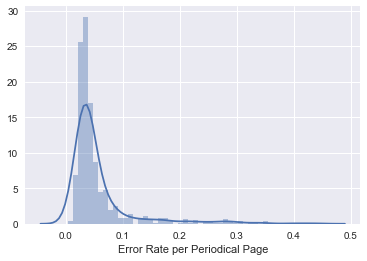

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 50 )

[('ñ', 1321),
 ('-', 669),
 ('m', 454),
 ('d', 418),
 ("'", 414),
 ('¥', 353),
 (')', 339),
 ('e', 318),
 ('tion', 258),
 ('*', 247),
 ('con-', 215),
 ('w', 204),
 ('f', 174),
 ('re-', 152),
 ('in-', 152),
 ('(', 151),
 ('g', 142),
 ('r', 134),
 ('t', 133),
 ('_', 124),
 ('dis-', 96),
 ('n', 88),
 ('be-', 85),
 ('¡', 84),
 ('pre-', 80),
 ('per-', 79),
 ('ã', 79),
 ('u', 78),
 ('ex-', 77),
 ('co', 74),
 ('--', 73),
 ('tions', 72),
 ('ment', 66),
 ('com-', 63),
 ('de-', 62),
 ('pro-', 62),
 ('=', 54)]

## Check Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)[:100]

[('ñ', 1321),
 ('¥', 353),
 (')', 339),
 ('*', 247),
 ('(', 151),
 ('_', 124),
 ('¡', 84),
 ('ã', 79),
 ('=', 54),
 ('<', 47),
 ('/', 37),
 ('ô', 25),
 ('ñthe', 24),
 ('¦', 22),
 ('<<', 22),
 ('**', 17),
 ('¥¥', 16),
 ('(see', 15),
 ('(to', 14),
 ('%', 14),
 ('(h', 14),
 ('ñh', 10),
 ('(ps', 10),
 ('(lincoln)', 10),
 ('_health', 10),
 ('ñthese', 10),
 ('(john', 10),
 ('addressñ', 10),
 ('__', 9),
 ('\\', 9),
 ('_-', 9),
 ('(rom', 9),
 ('*-', 9),
 ('(a)', 8),
 ('`', 8),
 ('if/', 8),
 ('(and', 8),
 ('#', 8),
 ('ñit', 7),
 ('ñthat', 7),
 ('-*', 7),
 ('[the', 7),
 ('ñin', 7),
 ('(matt', 7),
 ('___', 7),
 ('kñ', 7),
 ('(concluded', 7),
 ('(b)', 7),
 ('ñby', 6),
 ('(isa', 6),
 ('(c)', 6),
 ('(which', 6),
 (']', 6),
 ('(one', 6),
 ('(right)', 6),
 ('ãã', 6),
 ('ã_', 5),
 ('(acts', 5),
 ('(the', 5),
 ('[', 5),
 ('(a', 5),
 ('¥the', 5),
 ('ñi', 5),
 ('==', 5),
 ('(eph', 5),
 ("'¥", 5),
 ('ña', 4),
 ('(d)', 4),
 ("'*", 4),
 ('ñthen', 4),
 ('+', 4),
 ('pur\x8ee', 4),
 ('=-', 4),
 ('(good', 4),
 (

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"’", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 1

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GOH/correction1

Average verified rate: 0.9620343555361606

Average of error rates: 0.04705820895522388

Total token count: 478933



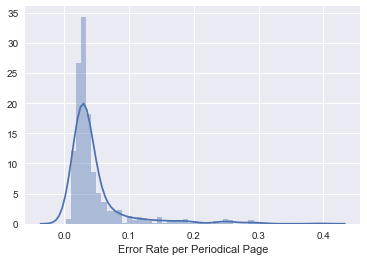

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 784),
 ("'", 464),
 ('m', 463),
 ('d', 429),
 ('e', 347),
 ('tion', 258),
 ('con-', 215),
 ('w', 209),
 ('f', 191),
 ('g', 153),
 ('in-', 153),
 ('re-', 152),
 ('t', 146),
 ('r', 145),
 ('n', 100),
 ('--', 97),
 ('dis-', 96),
 ('be-', 85),
 ('u', 80),
 ('pre-', 80),
 ('per-', 79),
 ('ex-', 77),
 ('co', 75),
 ('tions', 72),
 ('ment', 66),
 ('com-', 64),
 ('de-', 62),
 ('pro-', 62),
 ('im-', 48),
 ('mis-', 47),
 ('k', 46),
 ('ful', 45),
 ('ments', 44),
 ('un-', 43),
 ('q', 41),
 ('---', 40),
 ('ple', 37),
 ('sionary', 37),
 ('ical', 37),
 ('prin-', 37),
 ('sub-', 36),
 ('sani-', 33),
 ('op', 32),
 ('ac-', 32),
 ('tarium', 32),
 ('ciples', 31),
 ('condi-', 31),
 ('db', 31),
 ('princi-', 31),
 ('ber', 31)]

## Correction 2 -- Fix line endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = "correction1"
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 2

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GOH/correction2

Average verified rate: 0.9810627054607609

Average of error rates: 0.028468656716417913

Total token count: 472718



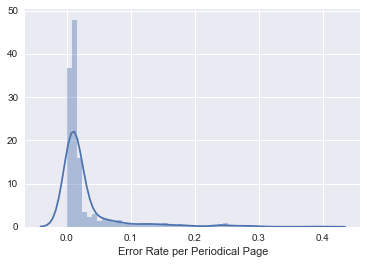

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 781),
 ("'", 464),
 ('m', 463),
 ('d', 429),
 ('e', 346),
 ('w', 209),
 ('f', 191),
 ('g', 153),
 ('t', 145),
 ('r', 144),
 ('n', 100),
 ('--', 97),
 ('u', 80),
 ('co', 75),
 ('k', 46),
 ('q', 41),
 ('---', 40),
 ('op', 32),
 ('db', 31),
 ('camp-ground', 30),
 ('ft', 29),
 ('th', 27),
 ("''", 27),
 ("workingmen's", 24),
 ('z', 22),
 ('abbie', 20),
 ('ex', 17),
 ("the'", 16),
 ('mc', 16),
 ('x', 16),
 ('grape-sugar', 15),
 ('left-over', 14),
 ('lenna', 13),
 ("'the", 13),
 ('----', 12),
 ('wm', 12),
 ('tion', 12),
 ("'s", 11),
 ('flesh-foods', 11)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = "correction2"
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 3

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GOH/correction3

Average verified rate: 0.9840901635007143

Average of error rates: 0.023855223880597017

Total token count: 472475



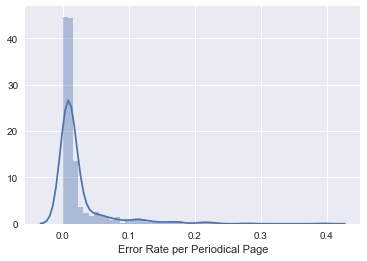

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 481),
 ('m', 463),
 ('d', 430),
 ('e', 351),
 ('w', 210),
 ('f', 197),
 ('g', 157),
 ('t', 155),
 ('r', 151),
 ('n', 101),
 ('co', 100),
 ('u', 81),
 ('k', 47),
 ('q', 41),
 ('op', 33),
 ('db', 31),
 ('ft', 30),
 ("''", 29),
 ('th', 27),
 ('camp-ground', 26),
 ('z', 25),
 ("workingmen's", 24),
 ('abbie', 20),
 ('ex', 18),
 ('x', 18),
 ("the'", 16),
 ('re', 16),
 ('mc', 16),
 ('lenna', 13),
 ("'the", 13),
 ('left-over', 13),
 ('wm', 12),
 ('-', 12),
 ('tion', 12),
 ("'s", 11)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = "correction3"
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 3:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 4

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GOH/correction4

Average verified rate: 0.9848074952794642

Average of error rates: 0.022889552238805972

Total token count: 472404



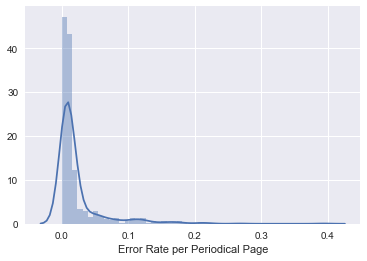

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 465),
 ('d', 430),
 ("'", 411),
 ('e', 354),
 ('w', 213),
 ('f', 198),
 ('t', 158),
 ('g', 157),
 ('r', 151),
 ('n', 103),
 ('co', 100),
 ('u', 81),
 ('k', 48),
 ('q', 41),
 ('op', 33),
 ('db', 31),
 ('ft', 30),
 ('th', 27),
 ('camp-ground', 26),
 ('z', 25),
 ("workingmen's", 24),
 ("''", 23),
 ('abbie', 20),
 ('ex', 18),
 ('x', 18),
 ('mc', 16),
 ('re', 16),
 ('lenna', 13),
 ("the'", 13),
 ('left-over', 13),
 ('wm', 12),
 ('-', 12),
 ('tion', 12)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = "correction4"
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GOH/correction5

Average verified rate: 0.9848198749349061

Average of error rates: 0.022858208955223884

Total token count: 472394



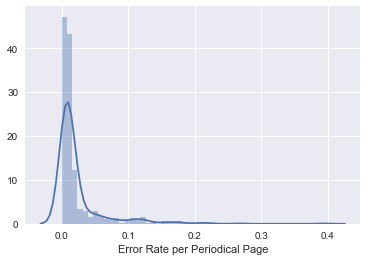

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 465),
 ('d', 429),
 ("'", 411),
 ('e', 353),
 ('w', 213),
 ('f', 198),
 ('g', 157),
 ('t', 157),
 ('r', 150),
 ('n', 102),
 ('co', 100),
 ('u', 81),
 ('k', 47),
 ('q', 41),
 ('op', 33),
 ('db', 31),
 ('ft', 30),
 ('th', 27),
 ('camp-ground', 26),
 ('z', 25),
 ("workingmen's", 24),
 ("''", 23),
 ('abbie', 20),
 ('ex', 18),
 ('x', 18),
 ('mc', 16),
 ('re', 16),
 ('lenna', 13),
 ("the'", 13),
 ('left-over', 13),
 ('wm', 12),
 ('-', 12),
 ('tion', 12)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = "correction5"
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GOH18970201-V01-01-page16.txt: [('nu', 'rses')]
GOH18970201-V01-01-page19.txt: [('BROMOS', 'E')]
GOH18970201-V01-01-page20.txt: [('CIRCULA', 'TION'), ('GLAS', 'GOW')]
GOH18970301-V01-02-page18.txt: [('Mc', 'Coy')]
GOH18970301-V01-02-page19.txt: [('Prin', 'ciples'), ('va', 'n')]
GOH18970301-V01-02-page20.txt: [('CIRCULA', 'TION'), ('GLAS', 'GOW')]
GOH18970301-V01-02-page5.txt: [('RE', 'FORM')]
GOH18970601-V01-05,06-page11.txt: [('AMERI', 'CAN')]
GOH18970601-V01-05,06-page21.txt: [('PUBLICA', 'TIONS')]
GOH18970601-V01-05,06-page26.txt: [('re', 'establishing'), ('perha', 'ps')]
GOH18970601-V01-05,06-page35.txt: [('PR', 'ES')]
GOH18970601-V01-05,06-page5.txt: [('AMERI', 'CAN')]
GOH18970601-V01-05,06-page8.txt: [('MIS', 'SIONARY')]
GOH18970801-V01-07-page18.txt: [('somethi', 'ng')]
GOH18970801-V01-07-page20.txt: [('Sani', 'tarium')]
GOH18970801-V01-07-page5.txt: [('askin', 'g')]
GOH18971001-V01-09-page19.txt: [('Sani', 'tarium')]
GOH18971001-V01-09-page7.txt: [('co', 'workers')]
GOH18971201

## Check Correction 6

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GOH/correction6

Average verified rate: 0.985174017900436

Average of error rates: 0.02240597014925373

Total token count: 472279



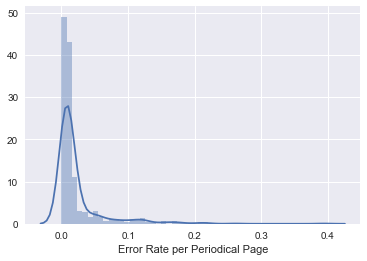

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 465),
 ('d', 429),
 ("'", 411),
 ('e', 349),
 ('w', 213),
 ('f', 198),
 ('g', 156),
 ('t', 155),
 ('r', 149),
 ('n', 100),
 ('u', 81),
 ('co', 79),
 ('k', 47),
 ('q', 41),
 ('op', 33),
 ('db', 31),
 ('ft', 30),
 ('camp-ground', 26),
 ('th', 25),
 ('z', 25),
 ("workingmen's", 24),
 ("''", 23),
 ('abbie', 20),
 ('x', 18),
 ('ex', 16),
 ('lenna', 13),
 ("the'", 13),
 ('left-over', 13),
 ('wm', 12),
 ('-', 12)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = "correction6"
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GOH18970201-V01-01-page14.txt: [('Y', 'es')]
GOH18970201-V01-01-page20.txt: [('SHAKES', 'PEARE'), ('INTER', 'LAKEN')]
GOH18970301-V01-02-page1.txt: [('C', 'oot')]
GOH18970301-V01-02-page19.txt: [('T', 'WENTY-NINE')]
GOH18970301-V01-02-page20.txt: [('INTER', 'LAKEN')]
GOH18970301-V01-02-page3.txt: [('OR', "PHANS'")]
GOH18970601-V01-05,06-page1.txt: [('C', 'oot')]
GOH18970601-V01-05,06-page10.txt: [('a', 'nd')]
GOH18970601-V01-05,06-page15.txt: [('MED', 'ICAL')]
GOH18970601-V01-05,06-page23.txt: [('f', 'ood')]
GOH18970601-V01-05,06-page5.txt: [('MISSION', 'ARY')]
GOH18970601-V01-05,06-page7.txt: [('MISSION', 'ARY')]
GOH18970601-V01-05,06-page9.txt: [('MISSION', 'ARY')]
GOH18970801-V01-07-page14.txt: [('the', 'se')]
GOH18971001-V01-09-page16.txt: [('HEAL', 'TH')]
GOH18971201-V01-11-page1.txt: [('COU', 'GH')]
GOH18971201-V01-11-page12.txt: [('con', 'stantly')]
GOH18971201-V01-11-page2.txt: [('A', 'ND')]
GOH18980101-V02-01-page18.txt: [('MED', 'ICAL')]
GOH18980101-V02-01-page25.txt: [('MED'

## Check Correction 7

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GOH/correction7

Average verified rate: 0.9852743431793781

Average of error rates: 0.02224179104477612

Total token count: 472237



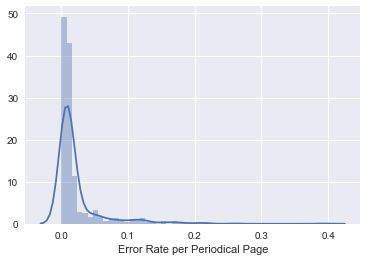

In [32]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 464),
 ('d', 429),
 ("'", 410),
 ('e', 349),
 ('w', 212),
 ('f', 197),
 ('g', 155),
 ('t', 154),
 ('r', 149),
 ('n', 100),
 ('u', 81),
 ('co', 79),
 ('k', 47),
 ('q', 41),
 ('op', 33),
 ('db', 31),
 ('ft', 30),
 ('camp-ground', 26),
 ('z', 25),
 ('th', 24),
 ("workingmen's", 24),
 ("''", 23),
 ('abbie', 20),
 ('x', 18),
 ('ex', 16),
 ('lenna', 13),
 ("the'", 13),
 ('left-over', 13),
 ('wm', 12),
 ('-', 12)]

## Review Remaining Errors

In [34]:
GoH.reports.docs_with_high_error_rate(summary)

[('GOH18970601-V01-05,06-page17.txt', 0.394),
 ('GOH18981101-V02-11-page19.txt', 0.261),
 ('GOH18980701-V02-07-page19.txt', 0.219),
 ('GOH18990401-V03-04-page2.txt', 0.214),
 ('GOH18981101-V02-11-page2.txt', 0.207),
 ('GOH18980701-V02-07-page20.txt', 0.202)]

In [35]:
doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.2]

In [36]:
# GoH.utilities.open_original_docs(doc_keys, directories['cycle'])

High errors on image pages and advertisements.

In [37]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['littleunderstood',
  'ttitrittittittittittmtmttittitttttittimttittittittimmttitti',
  'thoughtstimulating',
  'oriderfullrsupcessfal',
  'heaven-appointed',
  'house-furnishing',
  'scienceinthekitchen',
  'spanish-speaking',
  'awnidllinfinthdethieghbeosotkf',
  'applrthescprinciplesitrthe',
  'commander-in-chief',
  'aawaaaaaovvvoovvvvy',
  'tooverindulgence',
  'numbercontaining',
  'cettesseciecceseveessies',
  'wwwwhuowwwwwwwwwwaiwwwwwwwwimaiwuaiiimai',
  'itnhethctecmhtpatiear',
  'csaetanldogfouer',
  'square-shouldered',
  'unimpededlcirculation',
  'carnalmindedness',
  'esmliornagbligeetereetscoga',
  'poverty-stricken',
  'frankfort-on-the-main',
  'blackberry-juice',
  'osteromearammerse',
  'thisadvertisement',
  'sewage-contaminated',
  'aaatasisaasaaalaisa',
  'healthdestroying',
  'health-destroying',
  'insttiitututition',
  'commandment-keeping',
  'boarding-schools',
  'vvvvvvvvvvvvvvykin',
  'slaughter-houses',
  'aiiwtyaiylliyiiimmamosimmonm',
  'timittitiimmimi

## Correction 8 -- Remove long error tokens

In [39]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "a|A"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "v|V"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "w|W"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "t|T"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GOH18970201-V01-01-page2.txt: [('MTIMIMMMTIMIMMTTITIMIMITIMMITIMITIMIMIIIII', ' ')]
GOH18970201-V01-01-page20.txt: [('lailuuliliuwwwwwwwwwwwwwwwwwwwwauAluuumuuukiliwwwwww', ' ')]
GOH18970301-V01-02-page2.txt: [('TIMITTITIIMMIMIMITTTIMITMTIIITTIMMTMMITTITTIMMTIMMIMMMMitTMTM', ' '), ('TIMITTITIIMMIMIMITTTIMITMTIIITTIMMTMMITTITTIMMTIMMIMMMMitTMTM', ' ')]
GOH18970301-V01-02-page20.txt: [('WWWWHUOWWWWWWWWWWAIWWWWWWWWIMAIWUAIIIMAI', ' '), ('mtimmtmmTmemmmrwrmyrymmirimvmmmwmt.', ' ')]
GOH18970601-V01-05,06-page2.txt: [('MMMMAL"MMMMAMMWMMM', ' ')]
GOH18970801-V01-07-page1.txt: [('TTITriTTITTITTITTITTMTMTTITTITTTTTITTIMTTITTITTITTIMMTTITTI', ' ')]
GOH18970801-V01-07-page2.txt: [('MttttttttttttUAttt', ' ')]
GOH18970801-V01-07-page20.txt: [('AAAAAAAAAAAAAA', ' '), ('ZANNAANAAAAAAAAWAA', ' '), ('AAAAAAAAAAAMAAAAAAAAA', ' '), ('tAWAAAAAAAAAAAAOM', ' ')]
GOH18971001-V01-09-page19.txt: [('VVVVYVVVVVVVVVYVVVVVVVVVVVVVIAAAAAANYVVVVVVP', ' ')]
GOH18971001-V01-09-page3.txt: [('iiiiiiiiilllliIIIl', ' ')]


## Correction 9 -- Separate Squashed Words

In [41]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GOH18980601-V02-06-page30.txt: [('thoughtstimulating', 'thought stimulating')]
GOH18980801-V02-08-page2.txt: [('ScienceintheKitchen', 'Science in the Kitchen')]
GOH18980901-V02-09-page17.txt: [('ordinaryconventional', 'ordinary conventional')]
GOH18981201-V02-12-page27.txt: [('followinginstitutions', 'following institutions')]


Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GOH/correction9

Average verified rate: 0.9853289032042201

Average of error rates: 0.022110447761194033

Total token count: 472221



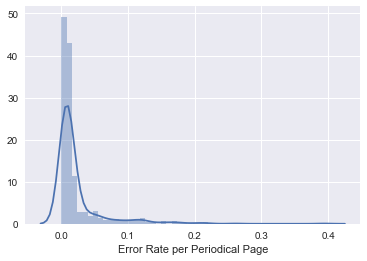

In [44]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [45]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 464),
 ('d', 429),
 ("'", 410),
 ('e', 349),
 ('w', 212),
 ('f', 197),
 ('g', 155),
 ('t', 154),
 ('r', 149),
 ('n', 100),
 ('u', 81),
 ('co', 79),
 ('k', 47),
 ('q', 41),
 ('op', 33),
 ('db', 31),
 ('ft', 30),
 ('camp-ground', 26),
 ('z', 25),
 ('th', 24),
 ("workingmen's", 24),
 ("''", 23),
 ('abbie', 20),
 ('x', 18),
 ('ex', 16),
 ('lenna', 13),
 ("the'", 13),
 ('left-over', 13),
 ('wm', 12),
 ('-', 12)]